# K-Nearest Neigbors Classifier - Random Dataset

In [32]:
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

from mlxtend.plotting import plot_decision_regions

import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

##### Generating the data

In [33]:
# Generates 1000 normally distributed points around a specified center
# Returns 2 arrays, 1 with coordinates and 1 with labels
inputs, target = make_blobs(n_samples = 1000,
                            centers = [(-3, 3), (0, 0), (2, 2)],
                            random_state = 365)

In [34]:
# X and Y coordinates
inputs

array([[ 1.63046017,  2.09402946],
       [-2.81125197,  3.85224116],
       [ 0.50105079,  1.58253051],
       ...,
       [-0.58897444,  0.31771066],
       [-2.3285928 ,  4.95748895],
       [-0.40093516, -0.18595288]])

In [35]:
inputs.shape, target.shape

((1000, 2), (1000,))

In [36]:
# Target labels
target[:50]

array([2, 0, 2, 0, 0, 2, 0, 2, 1, 0, 2, 1, 2, 2, 2, 1, 2, 0, 2, 2, 1, 1,
       2, 0, 1, 1, 1, 1, 1, 0, 2, 2, 1, 1, 2, 2, 0, 0, 2, 2, 2, 1, 2, 0,
       2, 2, 2, 2, 0, 1])

In [37]:
data = pd.DataFrame(data = inputs, columns = ['Feature 1', 'Feature 2'])
data['Target'] = target
data

,Feature 1,Feature 2,Target
0,1.630460,2.094029,2
1,-2.811252,3.852241,0
2,0.501051,1.582531,2
3,-3.624112,3.325318,0
4,-3.278106,2.359416,0
...,...,...,...
995,-4.412271,2.420197,0
996,0.398022,-0.847863,1
997,-0.588974,0.317711,1
998,-2.328593,4.957489,0


##### Plotting the data

In [38]:
knn_palette = sns.color_palette(['#000C1F', '#29757A', '#FF5050'])
knn_palette

[(0.0, 0.047058823529411764, 0.12156862745098039),
 (0.1607843137254902, 0.4588235294117647, 0.47843137254901963),
 (1.0, 0.3137254901960784, 0.3137254901960784)]

In [39]:
# Scatterplot
sns.scatterplot(x = 'Feature 1', y = 'Feature 2',
                data = data,
                hue = 'Target',
                palette = knn_palette,
                markers = [',', '^', 'P'],
                style = 'Target',
                s = 100)

<Axes: xlabel='Predicted label', ylabel='True label'>

In [40]:
# Jointplot -> Scatterplot and distributions to show all data is normally distributed
# Cant use markers in jointplot
sns.jointplot(x = 'Feature 1', y = 'Feature 2',
              data = data,
              hue = 'Target',
              palette = knn_palette,
              height = 10,
              s = 100,
              legend = True)

##### Train-test split

In [41]:
x_train, x_test, y_train, y_test = train_test_split(inputs, target,
                                                    test_size = 0.2,
                                                    random_state = 365,
                                                    stratify = target)

##### KNN model

In [42]:
classifier = KNeighborsClassifier(n_neighbors = 2, weights = 'distance')
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2, weights='distance')

##### Predicting

In [43]:
feature_1 = -0.18
feature_2 = 3.2

In [44]:
classifier.predict([[feature_1, feature_2]])

array([2])

##### Visualizing the neighbors

In [45]:
# Gives us the euclidian distances from closest neighbors and their indexes in the training data (x_train)
neighbors = classifier.kneighbors([[feature_1, feature_2]])
neighbors

(array([[0.27086818, 0.34749744]]), array([[336, 215]], dtype=int64))

In [46]:
plt.figure(figsize= (16,9))
# x_train[:, 0] all x-coordinates | x_train[:, 1] all y-coordinates
# Plotting all the training data points
sns.scatterplot(x = x_train[:, 0], y = x_train[:, 1],
                hue = y_train,
                palette = knn_palette,
                markers = [',', '^', 'p'],
                style = y_train,
                s = 100,
                legend = True)

# Adding our classified point
sns.scatterplot(x = [feature_1], y = [feature_2],
                style = [feature_2],
                markers= ['o'],
                s = 100,
                legend = False)

# Circling the closest points
plot_x_train = []
plot_y_train = []

# neighbors[1] = indexes of neighbors
for i in neighbors[1]:
    # X-coordinates of neighbors
    plot_x_train.append(x_train[i, 0])
    # Y-coordinates of neighbors
    plot_y_train.append(x_train[i, 1])

plt.scatter(x = plot_x_train, y = plot_y_train,
            s = 200,
            facecolors='none',
            edgecolors='blue')


##### Parameters of the model

In [47]:
classifier.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 2,
 'p': 2,
 'weights': 'distance'}

##### Decision region

In [48]:
# Start timing
start = time.time()

# Plot training data
# Highlight our single point
# Classifier = Our KNN classifier
# markers same as before
# colors same as before, can't use palette here
# Kwargs - s = size | edgecolor = marker edge color | alpha = transparency of the markers
# legend - if we want the tooltip or not 
plot_decision_regions(X = x_train, y = y_train,
                      X_highlight = np.array([[feature_1, feature_2]]),
                      clf = classifier,
                      markers = [',', '^', 'p'],
                      colors = '#000c1f,#29757a,#ff5050',
                      scatter_kwargs= {'s':100, 'edgecolor':'white', 'alpha':1},
                      legend = 0)

end = time.time()

print(f'Time elapsed: {round(end - start, 1)} seconds')

Time elapsed: 1.6 seconds


##### Decision region with 10 neighbors

In [49]:
classifier2 = KNeighborsClassifier(n_neighbors = 10, weights = 'distance')

classifier2.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10, weights='distance')

In [50]:

start = time.time()

plot_decision_regions(X = x_train, y = y_train,
                      clf = classifier2,
                      markers = [',', '^', 'p'],
                      colors = '#000c1f,#29757a,#ff5050',
                      scatter_kwargs= {'s':100, 'edgecolor':'white', 'alpha':1},
                      legend = 0)

end = time.time()

print(f'Time elapsed: {round(end - start, 1)} seconds')

Time elapsed: 2.8 seconds


##### Choosing the best K-value

In [51]:
# store uniform weight error rates
error_uniform = []
# store distance weight error rates
error_distance = []

# We'll try all Ks from 1 to 50
k_range = range(1,51)

for k in k_range:

    # Error rates for uniform weights
    classifier = KNeighborsClassifier(n_neighbors = k, weights = 'uniform')
    classifier.fit(x_train, y_train)
    predictions = classifier.predict(x_test)
    # Misclassification rate = 1 - accuracy
    error_uniform.append(1 - accuracy_score(y_test, predictions))

    # Error rates for distance weights
    classifier = KNeighborsClassifier(n_neighbors = k, weights = 'distance')
    classifier.fit(x_train, y_train)
    predictions = classifier.predict(x_test)
    error_distance.append(1 - accuracy_score(y_test, predictions))


##### Plotting the error rates

In [52]:
plt.figure(figsize=(16,9))

# Uniform error rates for each K-value
plt.plot(k_range, error_uniform,
         c = 'blue',
         linestyle = 'solid',
         marker = 'o',
         markerfacecolor = 'red',
         label = 'Error uniform')

# Distance error rates for each K-value
plt.plot(k_range, error_distance,
         c = 'green',
         linestyle = 'dashed',
         marker = 'o',
         markerfacecolor = 'red',
         label = 'Error distance')

# Show legend
plt.legend()

# Labels
plt.xlabel('K-value')
plt.ylabel('Error rate')

Text(0, 0.5, 'Error rate')

##### Grid search

* Another way to find the right parameters

In [53]:
# K values from 0-50
# weights either uniform or distance
parameters = {'n_neighbors': range(1,51),
              'weights':['uniform', 'distance']}

In [54]:
# Goes through all possible combinations of K-value and weights.
# Measures based on accuracy
grid_search = GridSearchCV(estimator = KNeighborsClassifier(),
                           param_grid = parameters,
                           scoring = 'accuracy')

In [55]:
# Fit for our data
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 51),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [56]:
# Best K-value and weights according to grid_search and our data
grid_search.best_params_

{'n_neighbors': 10, 'weights': 'uniform'}

In [57]:
# Using the best params
classifier = grid_search.best_estimator_

##### Predictions on the test dataset

In [58]:
# Predictions for test data
y_test_predictions = classifier.predict(x_test)

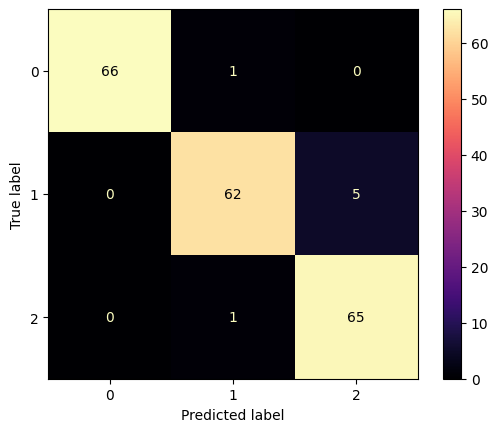

In [62]:
# Have to reset seaborn to get rid of lines messing up with confusion matrix
sns.reset_orig()

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(
    y_test, y_test_predictions,
    labels = classifier.classes_,
    cmap = 'magma'
)

plt.show()

##### Classification report

In [63]:
# 0 = Black Square
# 1 = Green Triangle
# 2 = Red Cross
print(classification_report(y_test, y_test_predictions, target_names=['Black Square', 'Green Triangle', 'Red Cross']))

                precision    recall  f1-score   support

  Black Square       1.00      0.99      0.99        67
Green Triangle       0.97      0.93      0.95        67
     Red Cross       0.93      0.98      0.96        66

      accuracy                           0.96       200
     macro avg       0.97      0.97      0.96       200
  weighted avg       0.97      0.96      0.97       200

